In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


# Import Dataset

In [2]:
df=pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**Find null and duplicated values**

In [4]:
df=df.drop(['Id'],axis=1)

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.duplicated().sum()

125

In [7]:
df=df.drop_duplicates()

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,5.641454
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**EDA and outlier detection**

In [9]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

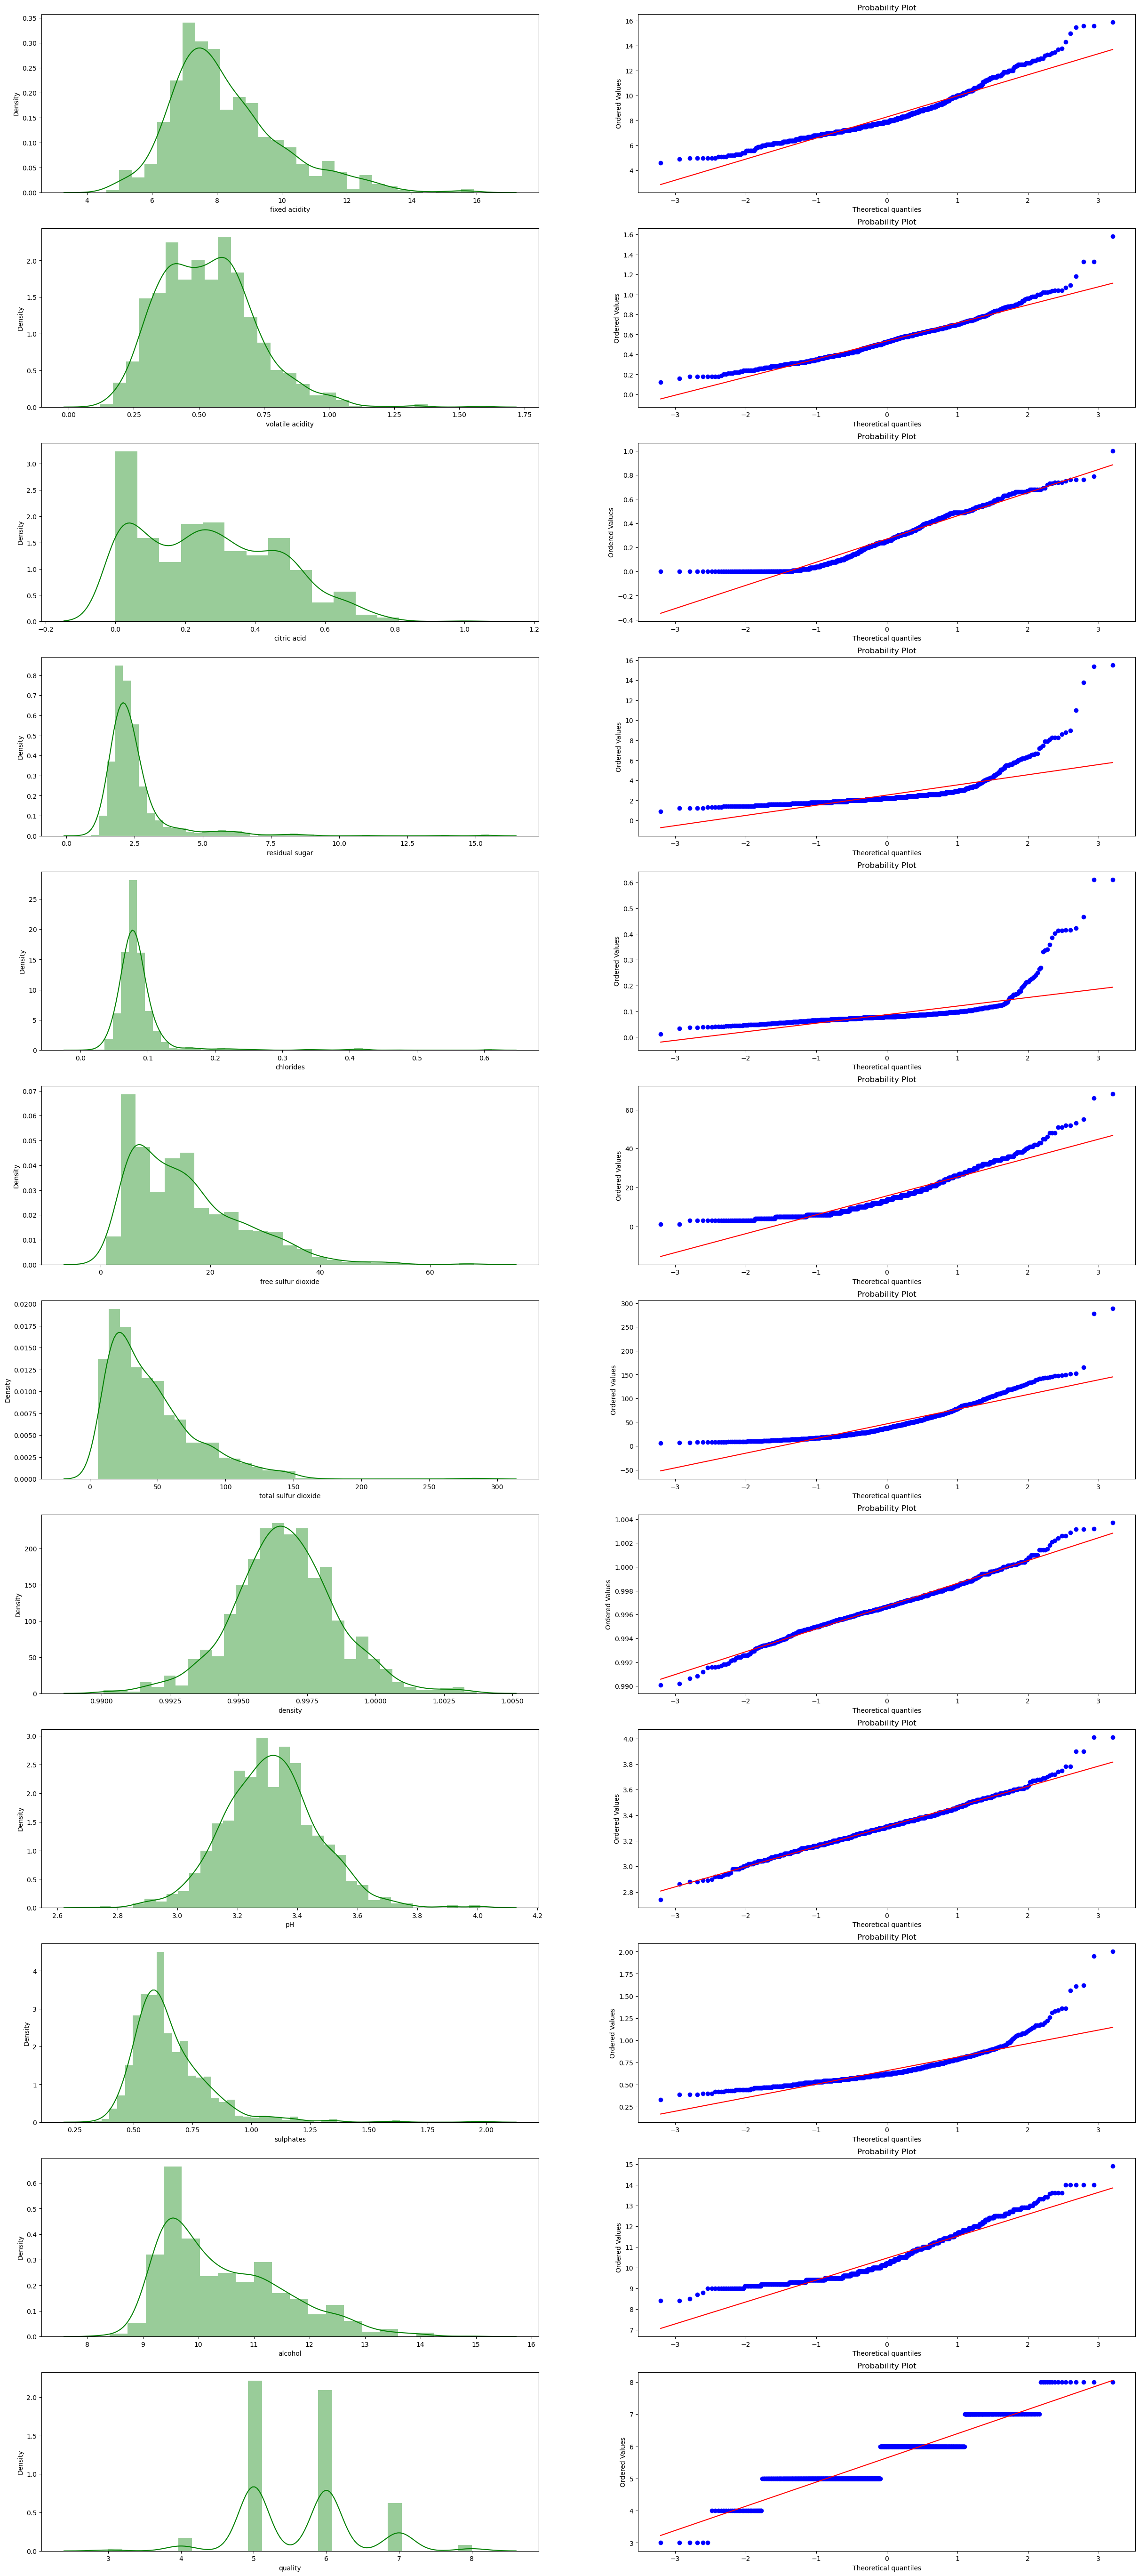

In [15]:
fig,ax = plt.subplots(12,2,figsize=(30,70))
for index,i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    stats.probplot(df[i],plot=ax[index,1])

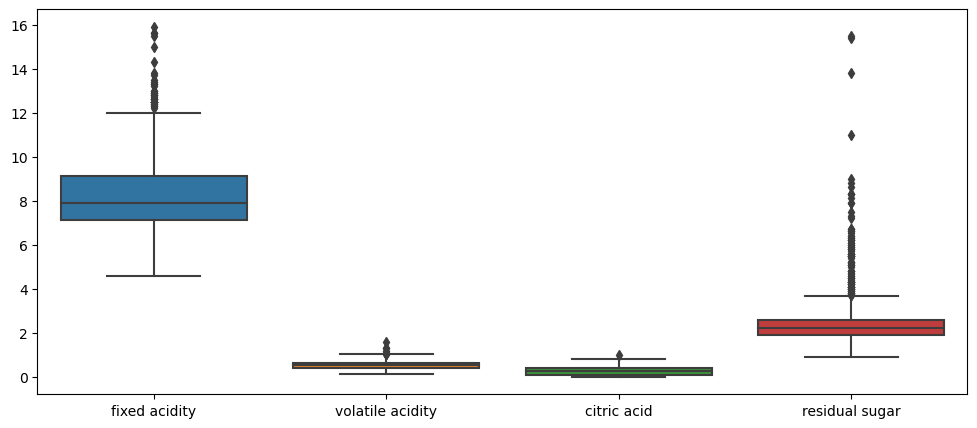

In [16]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df.columns[0:4]])
plt.show()

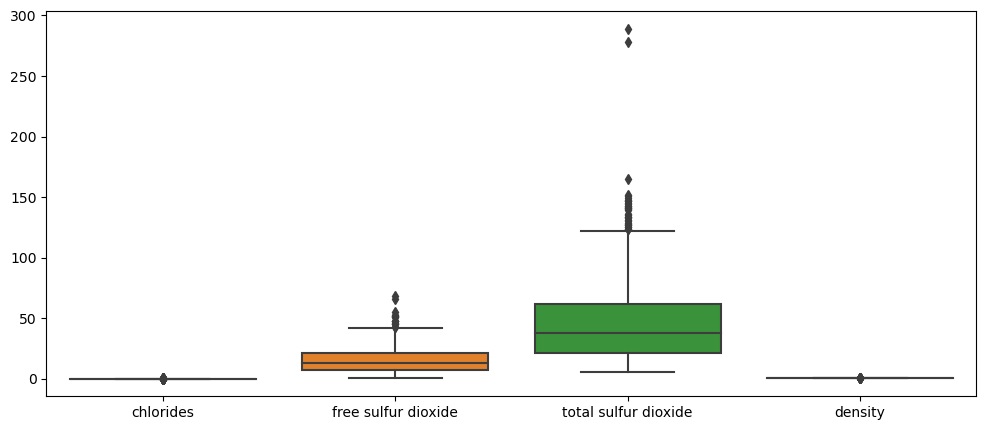

In [17]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df.columns[4:8]])
plt.show()

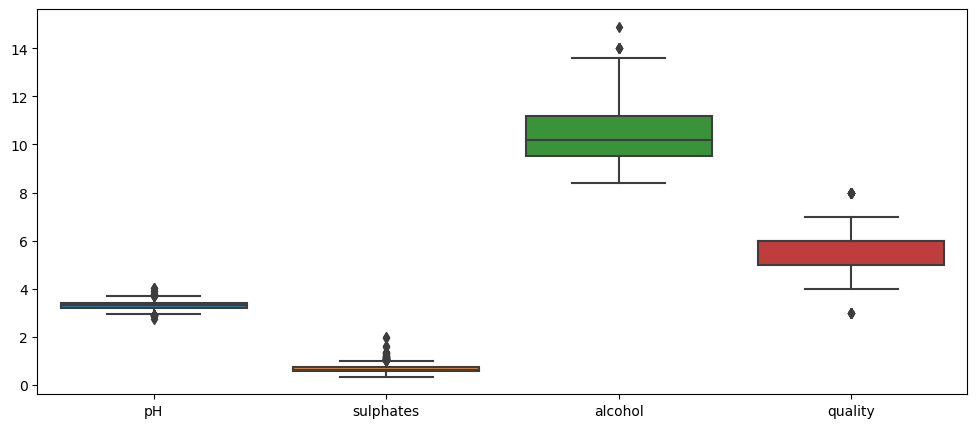

In [18]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df.columns[8:]])
plt.show()

In [19]:
def outlier_detection(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    df = df[(z_scores < 3)]
    print(column,'has',len(np.where(z_scores>3)[0]),'outliers')
    return df

In [20]:
for column in df.columns:
    df = outlier_detection(df, column)

fixed acidity has 8 outliers
volatile acidity has 5 outliers
citric acid has 1 outliers
residual sugar has 20 outliers
chlorides has 19 outliers
free sulfur dioxide has 10 outliers
total sulfur dioxide has 15 outliers
density has 7 outliers
pH has 6 outliers
sulphates has 14 outliers
alcohol has 4 outliers
quality has 5 outliers


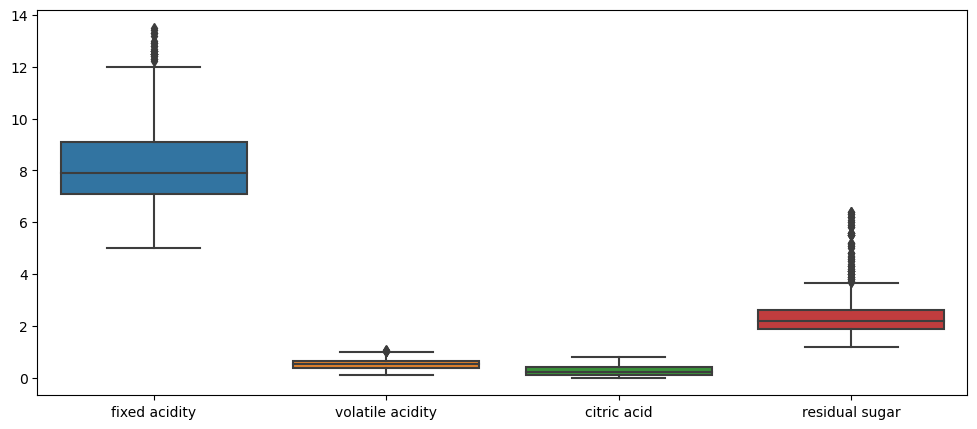

In [21]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df.columns[0:4]])
plt.show()

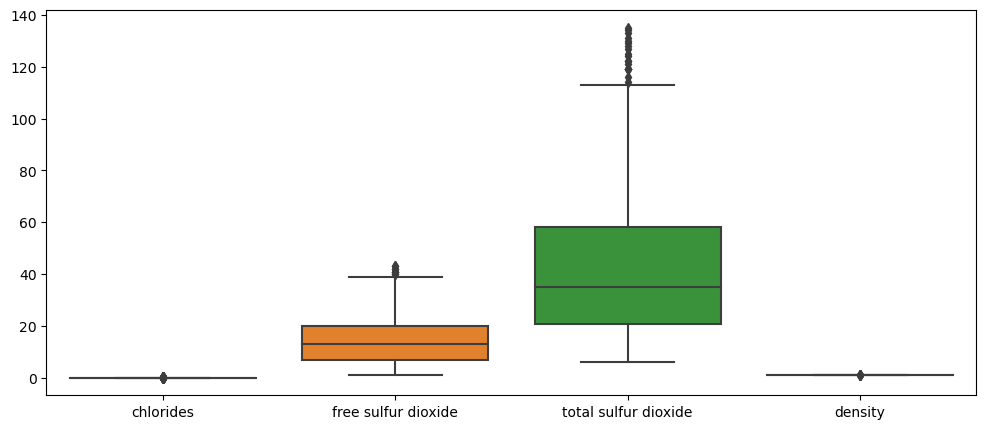

In [22]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df.columns[4:8]])
plt.show()

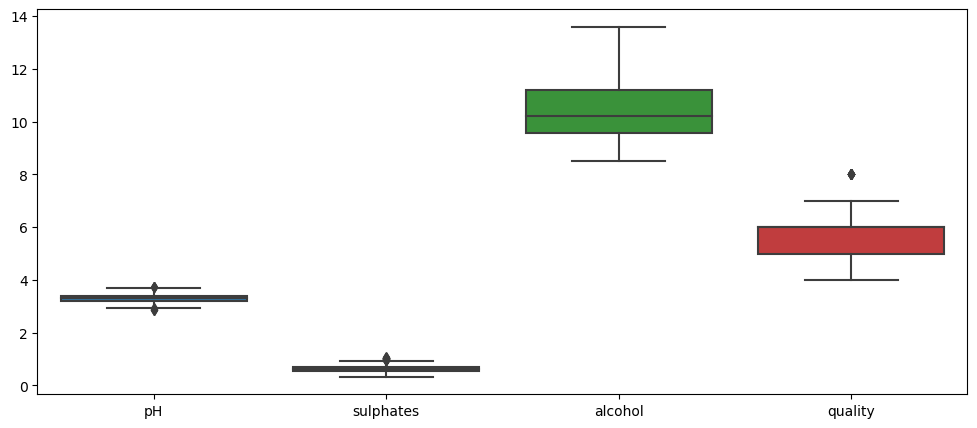

In [23]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[df.columns[8:]])
plt.show()

**Correlation matrix**

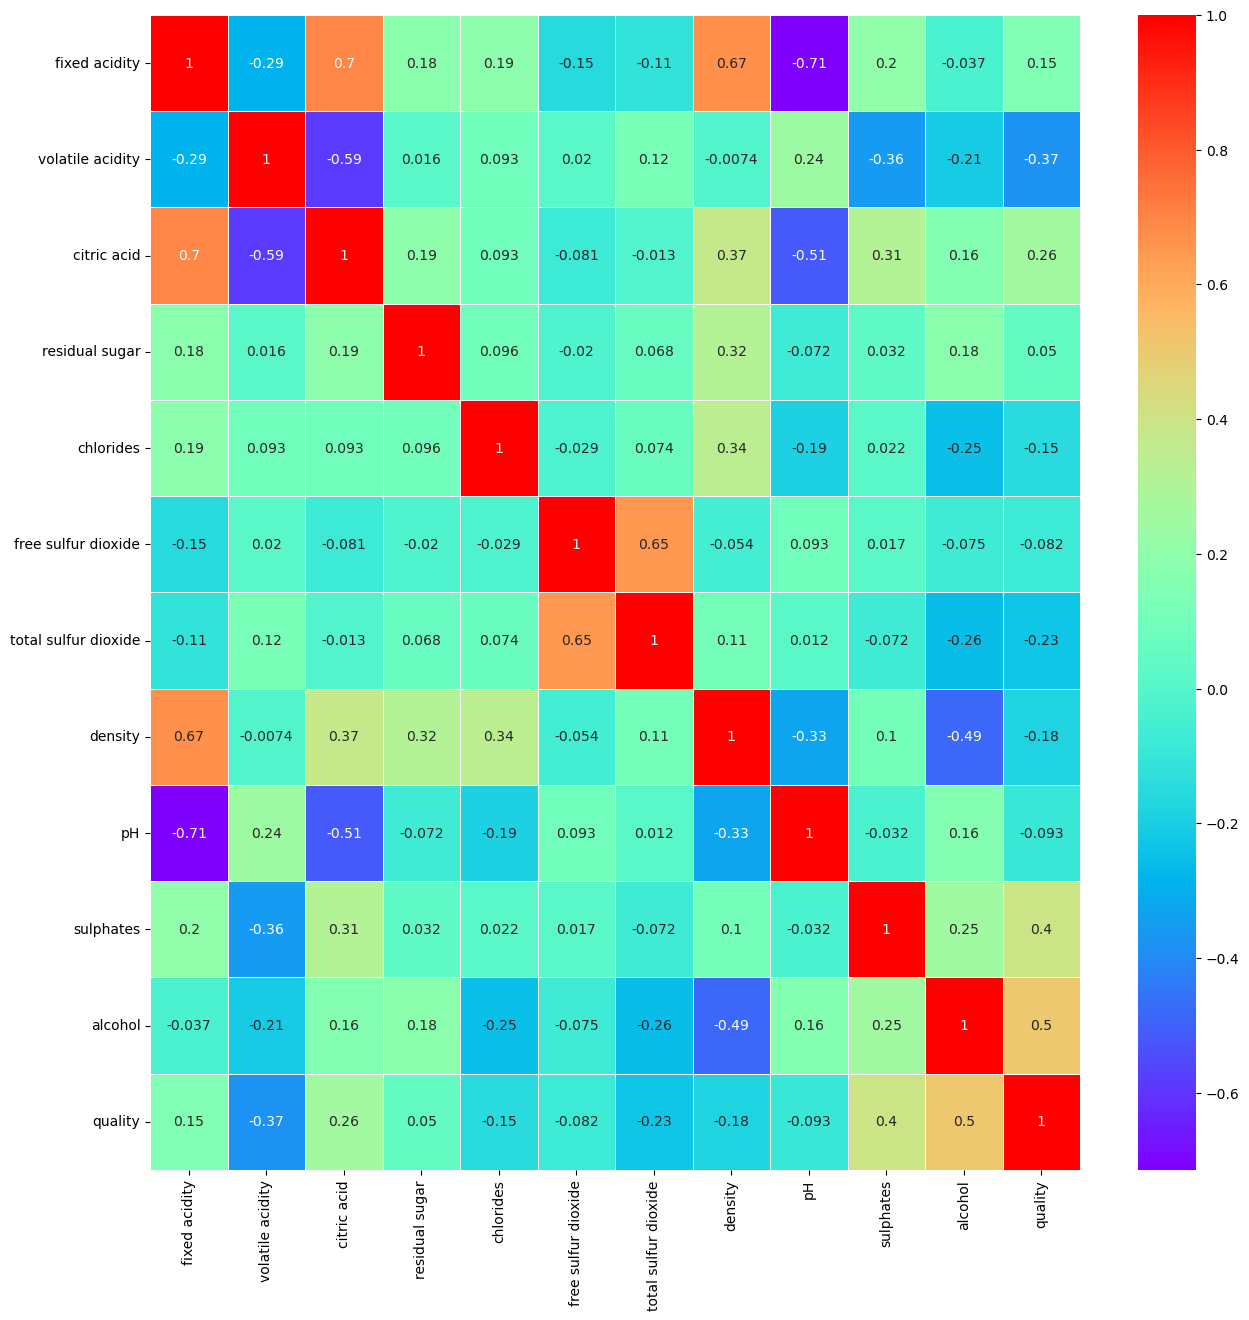

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=0.5,annot=True,cmap='rainbow')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import ElasticNet, Lasso,LinearRegression,RidgeCV
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR

In [26]:
X=df.drop(['quality'],axis =1)

In [27]:
y=df['quality']

In [28]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=11)

In [29]:
X_train.shape

(723, 11)

In [30]:
X_test.shape

(181, 11)

**Train model with standard scaler**

In [31]:
pipelines = {
    'en':make_pipeline(StandardScaler(), ElasticNet()),
    'lasso':make_pipeline(StandardScaler(), Lasso()),
    'Rcv':make_pipeline(StandardScaler(), RidgeCV()),
    'CatB':make_pipeline(StandardScaler(), CatBoostRegressor(eval_metric='RMSE',verbose=1000)),
    'lr':make_pipeline(StandardScaler(), LinearRegression()),
    'rf':make_pipeline(StandardScaler(), RandomForestRegressor()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingRegressor()),
    'dtc':make_pipeline(StandardScaler(),DecisionTreeRegressor()),
    'xg':make_pipeline(StandardScaler(),XGBRegressor()),
    'svr':make_pipeline(StandardScaler(),SVR())
}

In [32]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

Learning rate set to 0.038898
0:	learn: 0.7818388	total: 55.4ms	remaining: 55.3s
999:	learn: 0.1899173	total: 1.15s	remaining: 0us


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
maes=[]
al=[]
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    al.append(algo)
    maes.append(mean_squared_error(y_test,yhat)**0.5)
    print(algo,'MEAN ABSOLUTE ERROR', mean_absolute_error(y_test,yhat))
    print(algo,'ROOT MEAN SQUARED ERROR',mean_squared_error(y_test,yhat)**0.5)

en MEAN ABSOLUTE ERROR 0.6293528346438642
en ROOT MEAN SQUARED ERROR 0.7411059366189449
lasso MEAN ABSOLUTE ERROR 0.6293528346438642
lasso ROOT MEAN SQUARED ERROR 0.7411059366189449
Rcv MEAN ABSOLUTE ERROR 0.4637356188684682
Rcv ROOT MEAN SQUARED ERROR 0.6030296471080426
CatB MEAN ABSOLUTE ERROR 0.49854882835936865
CatB ROOT MEAN SQUARED ERROR 0.6467871795226636
lr MEAN ABSOLUTE ERROR 0.4636414864627432
lr ROOT MEAN SQUARED ERROR 0.6040914593513997
rf MEAN ABSOLUTE ERROR 0.4702762430939227
rf ROOT MEAN SQUARED ERROR 0.6171535084876971
gb MEAN ABSOLUTE ERROR 0.48779521382647945
gb ROOT MEAN SQUARED ERROR 0.6415702841275749
dtc MEAN ABSOLUTE ERROR 0.5303867403314917
dtc ROOT MEAN SQUARED ERROR 0.8539799575843693
xg MEAN ABSOLUTE ERROR 0.513926250499915
xg ROOT MEAN SQUARED ERROR 0.6629363383543619
svr MEAN ABSOLUTE ERROR 0.4508771683411501
svr ROOT MEAN SQUARED ERROR 0.6078923255086133


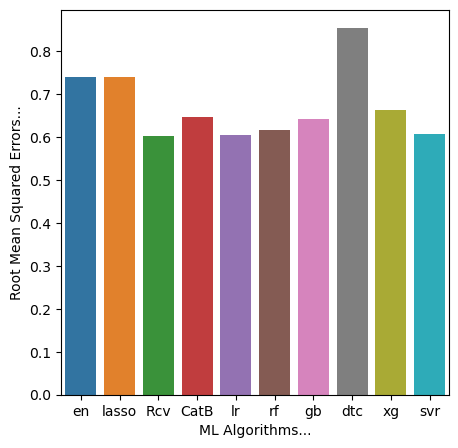

In [34]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Root Mean Squared Errors...')
ax=sns.barplot(x=al,y=maes)
plt.show()

**Stacked regressor with Standard Scaler pipeline**

In [35]:
rcv = RidgeCV()
sv = SVR()
lr=LinearRegression()

stregr = StackingRegressor(estimators=[('svr', sv),('lr',lr),('rcv',rcv)],
                           final_estimator=lr)

pipeline = make_pipeline(
    StandardScaler(),
    stregr
)
pipeline.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Root Mean Squared Error: %.4f" % mean_squared_error(y_test,y_pred)**0.5)

Root Mean Squared Error: 0.5976


In [36]:
al.append('stacked model')
maes.append(mean_squared_error(y_test,y_pred)**0.5)

In [37]:
for i in range(11):
    print("The RMSE of",al[i],'is',maes[i])

The RMSE of en is 0.7411059366189449
The RMSE of lasso is 0.7411059366189449
The RMSE of Rcv is 0.6030296471080426
The RMSE of CatB is 0.6467871795226636
The RMSE of lr is 0.6040914593513997
The RMSE of rf is 0.6171535084876971
The RMSE of gb is 0.6415702841275749
The RMSE of dtc is 0.8539799575843693
The RMSE of xg is 0.6629363383543619
The RMSE of svr is 0.6078923255086133
The RMSE of stacked model is 0.5975688129696362


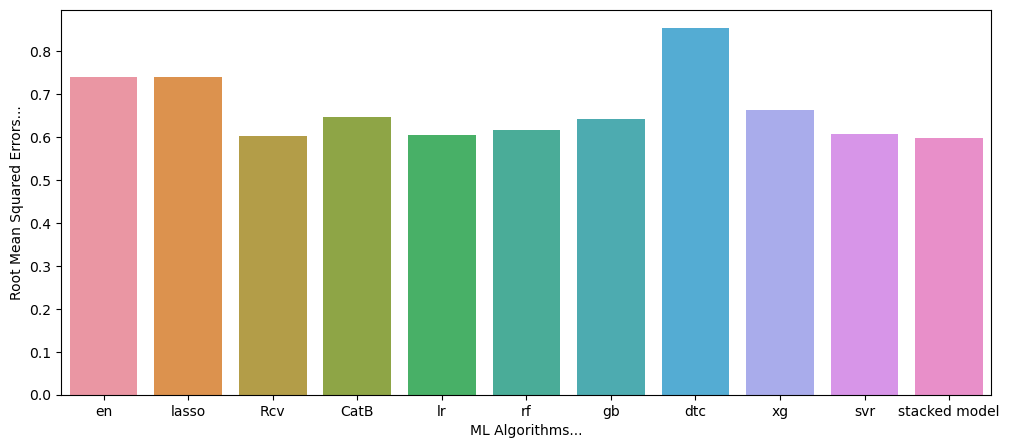

In [38]:
plt.figure(figsize=(12,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Root Mean Squared Errors...')
ax=sns.barplot(x=al,y=maes)
plt.show()

**Train model with min max scaler**

In [39]:
pipelines1 = {
    'en':make_pipeline(MinMaxScaler(), ElasticNet()),
    'lasso':make_pipeline(MinMaxScaler(), Lasso()),
    'Rcv':make_pipeline(MinMaxScaler(), RidgeCV()),
    'CatB':make_pipeline(MinMaxScaler(), CatBoostRegressor(eval_metric='RMSE',verbose=1000)),
    'lr':make_pipeline(MinMaxScaler(), LinearRegression()),
    'rf':make_pipeline(MinMaxScaler(), RandomForestRegressor()),
    'gb':make_pipeline(MinMaxScaler(), GradientBoostingRegressor()),
    'dtc':make_pipeline(MinMaxScaler(),DecisionTreeRegressor()),
    'xg':make_pipeline(MinMaxScaler(),XGBRegressor()),
    'svr':make_pipeline(MinMaxScaler(),SVR())
}

In [40]:
fit_model = {}
for algo, pipeline in pipelines1.items():
    model = pipeline.fit(X_train, y_train)
    fit_model[algo] = model

Learning rate set to 0.038898
0:	learn: 0.7818388	total: 2.26ms	remaining: 2.26s
999:	learn: 0.1899173	total: 1.1s	remaining: 0us


In [41]:
maes1=[]
al1=[]
for algo, model in fit_model.items():
    yhat = model.predict(X_test)
    al1.append(algo)
    maes1.append(mean_squared_error(y_test,yhat)**0.5)
    print(algo,'MEAN ABSOLUTE ERROR', mean_absolute_error(y_test,yhat))
    print(algo,'ROOT MEAN SQUARED ERROR',mean_squared_error(y_test,yhat)**0.5)

en MEAN ABSOLUTE ERROR 0.6293528346438642
en ROOT MEAN SQUARED ERROR 0.7411059366189449
lasso MEAN ABSOLUTE ERROR 0.6293528346438642
lasso ROOT MEAN SQUARED ERROR 0.7411059366189449
Rcv MEAN ABSOLUTE ERROR 0.46354932408680616
Rcv ROOT MEAN SQUARED ERROR 0.6014575440411096
CatB MEAN ABSOLUTE ERROR 0.4981619851786792
CatB ROOT MEAN SQUARED ERROR 0.6465351846462314
lr MEAN ABSOLUTE ERROR 0.46364148646274334
lr ROOT MEAN SQUARED ERROR 0.6040914593513996
rf MEAN ABSOLUTE ERROR 0.4667955801104972
rf ROOT MEAN SQUARED ERROR 0.6086081394487877
gb MEAN ABSOLUTE ERROR 0.48660915724520376
gb ROOT MEAN SQUARED ERROR 0.6386393010277186
dtc MEAN ABSOLUTE ERROR 0.5469613259668509
dtc ROOT MEAN SQUARED ERROR 0.8636297549246206
xg MEAN ABSOLUTE ERROR 0.514695378298259
xg ROOT MEAN SQUARED ERROR 0.6640307778274754
svr MEAN ABSOLUTE ERROR 0.44631448389372164
svr ROOT MEAN SQUARED ERROR 0.6038413130598276


**Stacked regressor with Min Max Scaler pipeline**

In [42]:
rcv = RidgeCV()
sv = SVR()
lr=LinearRegression()

stregr1 = StackingRegressor(estimators=[('svr', sv),('rcv',rcv)],
                           final_estimator=lr)

pipeline = make_pipeline(
    MinMaxScaler(),
    stregr
)
pipeline.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Root Mean Squared Error: %.4f" % mean_squared_error(y_test,y_pred)**0.5)

Root Mean Squared Error: 0.5973


In [43]:
al1.append('stacked model')
maes1.append(mean_squared_error(y_test,y_pred)**0.5)

In [44]:
for i in range(11):
    print("The RMSE of",al1[i],'is',maes1[i])

The RMSE of en is 0.7411059366189449
The RMSE of lasso is 0.7411059366189449
The RMSE of Rcv is 0.6014575440411096
The RMSE of CatB is 0.6465351846462314
The RMSE of lr is 0.6040914593513996
The RMSE of rf is 0.6086081394487877
The RMSE of gb is 0.6386393010277186
The RMSE of dtc is 0.8636297549246206
The RMSE of xg is 0.6640307778274754
The RMSE of svr is 0.6038413130598276
The RMSE of stacked model is 0.5973360602903455


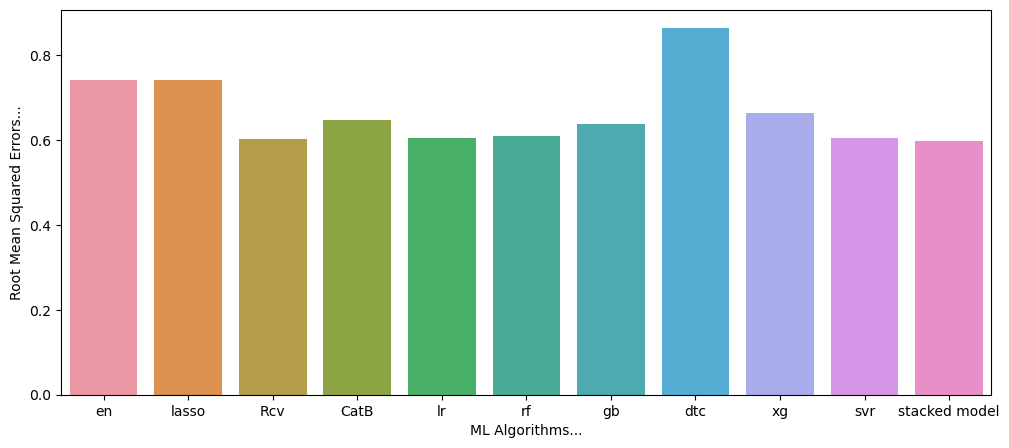

In [45]:
plt.figure(figsize=(12,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Root Mean Squared Errors...')
ax=sns.barplot(x=al1,y=maes1)
plt.show()

In [46]:
rcv = stregr1
sv = stregr
lr=LinearRegression()

stregr = StackingRegressor(estimators=[('Stack 1', stregr),('Stack 2', stregr1)],
                           final_estimator=lr)

pipeline = make_pipeline(
    StandardScaler(),
    stregr
)
pipeline.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Root Mean Squared Error: %.4f" % mean_squared_error(y_test,y_pred)**0.5)

Root Mean Squared Error: 0.5978


**Stacked regressor with previous stacked regressors**

In [47]:
al1.append('Double stacked model')
maes1.append(mean_squared_error(y_test,y_pred)**0.5)

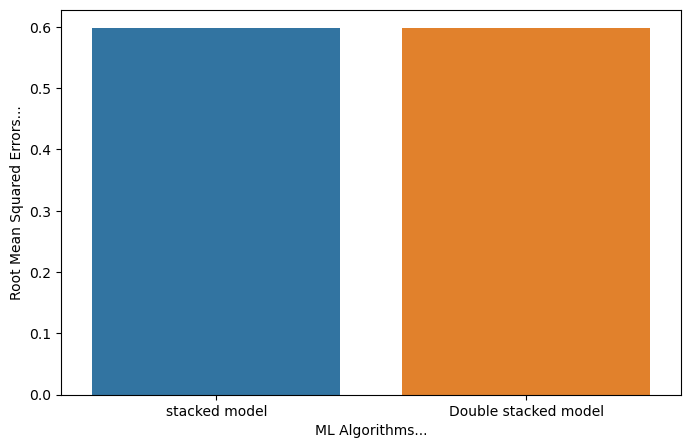

In [53]:
plt.figure(figsize=(8,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Root Mean Squared Errors...')
ax=sns.barplot(x=al1[10:],y=maes1[10:])
plt.show()

If you find the provided solution helpful, please consider upvoting it. Your feedback is appreciated!